In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
# images,size(32x32), RGB

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0] #3D array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

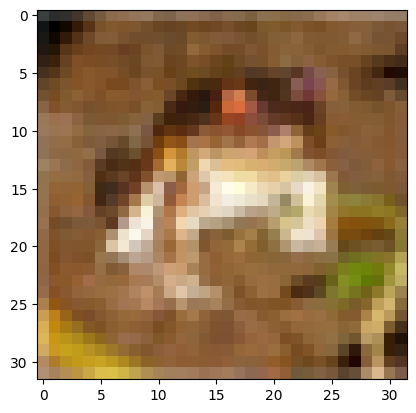

In [8]:
plt.imshow(X_train[0])

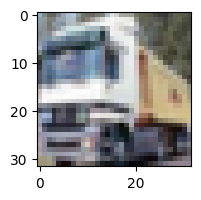

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)   #we do not want to change the first dimension ie 10000 so we use -1
y_train[:5]                    #we get a 1D array ie flatten array

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes="airplane automobile bird cat deer dog frog horse ship truck".split()

In [14]:
classes[0]

'airplane'

In [15]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

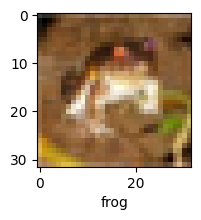

In [16]:
plot_sample(X_train,y_train,0)

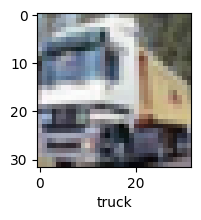

In [17]:
plot_sample(X_train,y_train,1)

normalize the data.
to do this we divide the array by 255

In [18]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 45ms/step - loss: 1.8120 - accuracy: 0.3546
Epoch 2/5
 838/1563 [===============>..............] - ETA: 32s - loss: 1.6426 - accuracy: 0.4228

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

In [ ]:
tf.config.experimental.list_physical_devices()

In [ ]:
cnn= models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')   #normalises the value
])

if we use sigmoid then probabilities can come out as

class 1: 0.45
class 2: 0.67

if we use softmax we get

class 1: 0.45/(0.45+0.67)
class 2: 0.67/(0.45+0.67)

addition of class 1 and class 2 is 1


In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=10)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]

In [ ]:
y_classes[:5]

In [ ]:
print(classification_report(y_test,y_classes))